# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        status_code = response.status_code
        
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass



# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | traiguen
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | matai
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | manakara
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | ceerigaabo
Processing Record 8 of Set 1 | st. albert
Processing Record 9 of Set 1 | verkhnevilyuysk
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | timbuktu
Processing Record 15 of Set 1 | yuzhno-kurilsk
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | al ghayzah
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | bembibre
Processing Record 22 of Set 1 | w

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,traiguen,-38.2500,-72.6833,44.44,93.0,100.0,7.87,CL,1.718678e+09
1,waitangi,-43.9535,-176.5597,49.82,87.0,78.0,7.00,NZ,1.718678e+09
2,matai,-8.3000,31.5167,54.84,71.0,0.0,5.21,TZ,1.718678e+09
3,margaret river,-33.9500,115.0667,60.51,57.0,89.0,17.72,AU,1.718678e+09
4,manakara,-22.1333,48.0167,67.82,83.0,90.0,2.82,MG,1.718678e+09


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,traiguen,-38.2500,-72.6833,44.44,93.0,100.0,7.87,CL,1.718678e+09
1,waitangi,-43.9535,-176.5597,49.82,87.0,78.0,7.00,NZ,1.718678e+09
2,matai,-8.3000,31.5167,54.84,71.0,0.0,5.21,TZ,1.718678e+09
3,margaret river,-33.9500,115.0667,60.51,57.0,89.0,17.72,AU,1.718678e+09
4,manakara,-22.1333,48.0167,67.82,83.0,90.0,2.82,MG,1.718678e+09


In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        615 non-null    object 
 1   Lat         580 non-null    float64
 2   Lng         580 non-null    float64
 3   Max Temp    580 non-null    float64
 4   Humidity    580 non-null    float64
 5   Cloudiness  580 non-null    float64
 6   Wind Speed  580 non-null    float64
 7   Country     575 non-null    object 
 8   Date        580 non-null    float64
dtypes: float64(7), object(2)
memory usage: 48.0+ KB


In [10]:
city_data_df.loc[pd.isnull(city_data_df.Lat)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
27,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,paradera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,cargados carajos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,renk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,chicxulub puerto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,san jose ixtapa (barrio viejo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,pont-l'abbe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,tekane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,sishilichengzi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = city_data_df.dropna(how="any").reset_index()

df.info

<bound method DataFrame.info of      City_ID            City      Lat       Lng  Max Temp  Humidity  \
0          0        traiguen -38.2500  -72.6833     44.44      93.0   
1          1        waitangi -43.9535 -176.5597     49.82      87.0   
2          2           matai  -8.3000   31.5167     54.84      71.0   
3          3  margaret river -33.9500  115.0667     60.51      57.0   
4          4        manakara -22.1333   48.0167     67.82      83.0   
..       ...             ...      ...       ...       ...       ...   
570      610    nishinoomote  30.7333  131.0000     73.96      88.0   
571      611      leopoldina -21.5319  -42.6431     62.82      74.0   
572      612           sinan  34.8262  126.1086     80.71      82.0   
573      613             sur  22.5667   59.5289     93.85      42.0   
574      614       pengcheng  36.4311  114.1700     96.67      25.0   

     Cloudiness  Wind Speed Country          Date  
0         100.0        7.87      CL  1.718678e+09  
1          

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

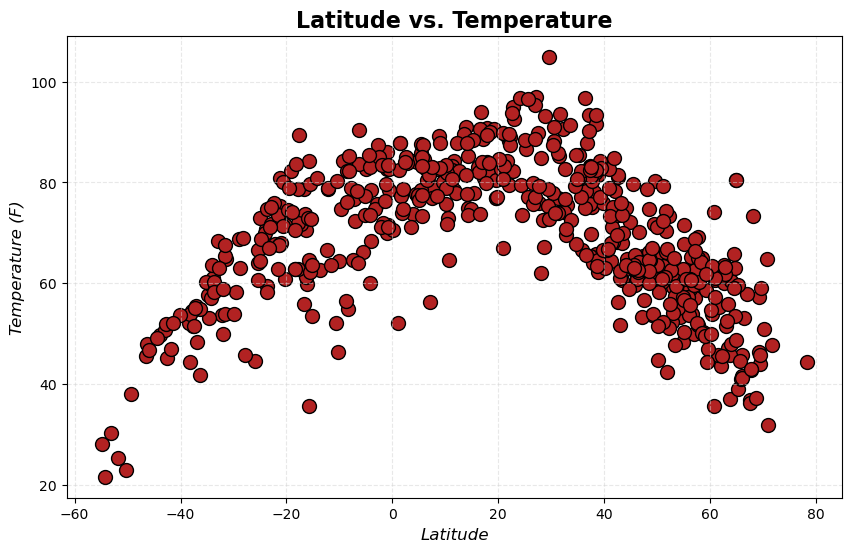

In [12]:
# Build scatter plot for latitude vs. temperature
x = df.Lat
y = df["Max Temp"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

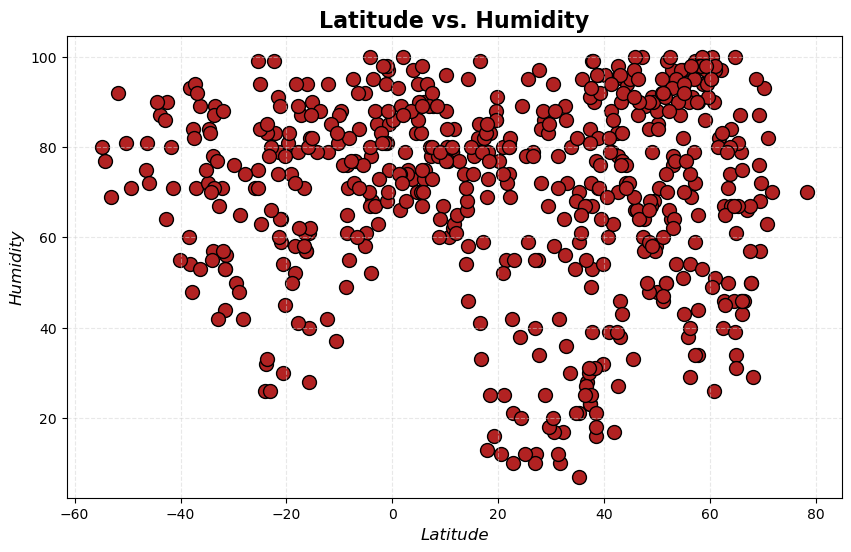

In [13]:
# Build the scatter plots for latitude vs. humidity
x = df.Lat
y = df.Humidity

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

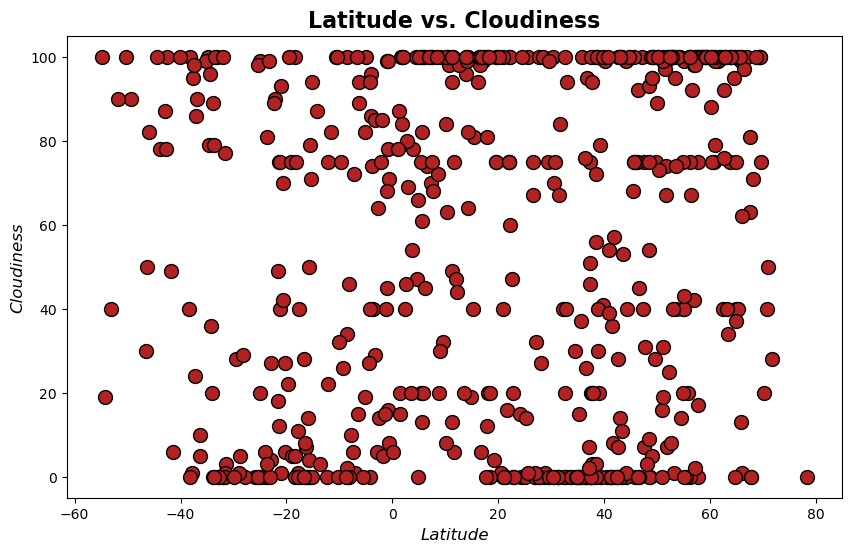

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x = df.Lat
y = df["Cloudiness"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontsize=16)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

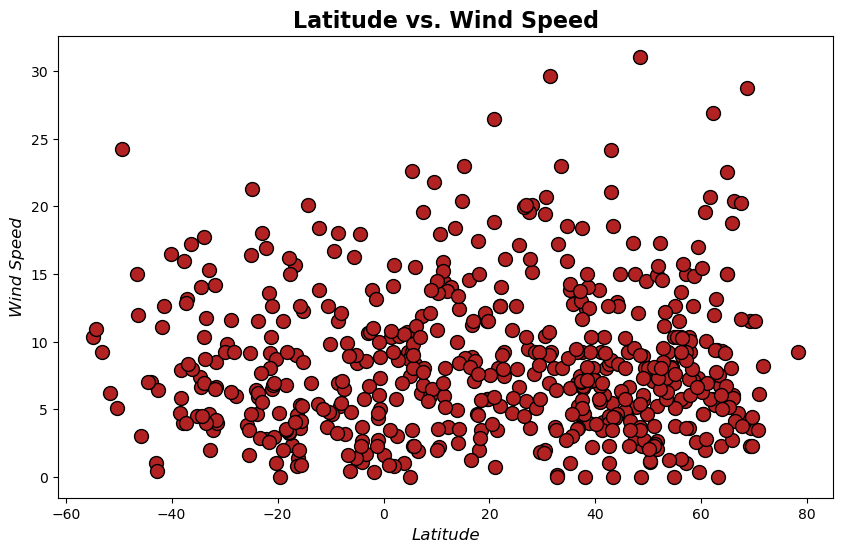

In [15]:
# Build the scatter plots for latitude vs. wind speed
x = df.Lat
y = df["Wind Speed"]

plt.figure(figsize=(10,6))

plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontsize=16)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(10, 6))
    

    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,5,vilyuchinsk,52.9306,158.4028,55.67,78.0,100.0,7.56,RU,1.718678e+09
6,6,ceerigaabo,10.6162,47.3680,64.65,60.0,98.0,17.94,SO,1.718678e+09
7,7,st. albert,53.6334,-113.6353,54.27,54.0,40.0,9.22,CA,1.718678e+09
8,8,verkhnevilyuysk,63.4453,120.3167,47.12,71.0,100.0,6.71,RU,1.718678e+09
9,9,albany,42.6001,-73.9662,81.01,70.0,28.0,1.01,US,1.718678e+09


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,traiguen,-38.2500,-72.6833,44.44,93.0,100.0,7.87,CL,1.718678e+09
1,1,waitangi,-43.9535,-176.5597,49.82,87.0,78.0,7.00,NZ,1.718678e+09
2,2,matai,-8.3000,31.5167,54.84,71.0,0.0,5.21,TZ,1.718678e+09
3,3,margaret river,-33.9500,115.0667,60.51,57.0,89.0,17.72,AU,1.718678e+09
4,4,manakara,-22.1333,48.0167,67.82,83.0,90.0,2.82,MG,1.718678e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5414571968937436


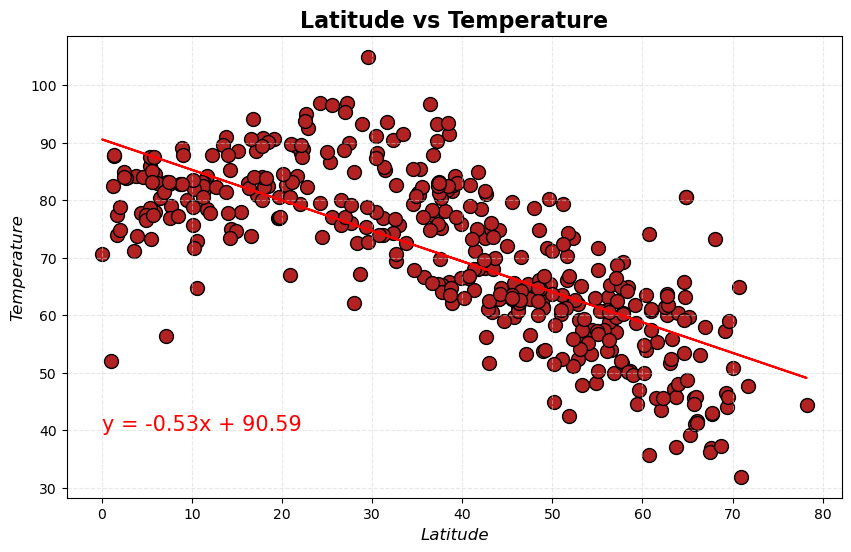

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat 
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (0,40))

The r-squared is: 0.5933087672786616


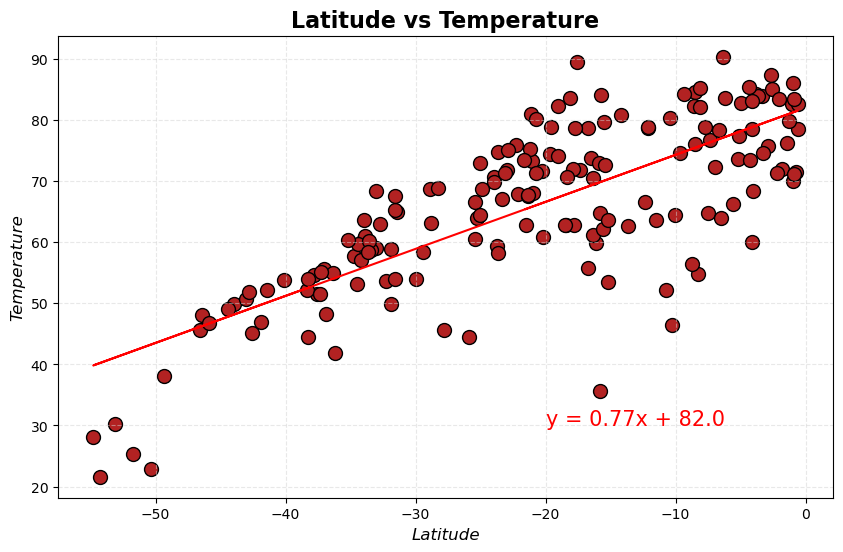

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat 
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,30))

**Discussion about the linear relationship:** Closer to the Equator you go the hotter the temperature gets in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0004959621080674278


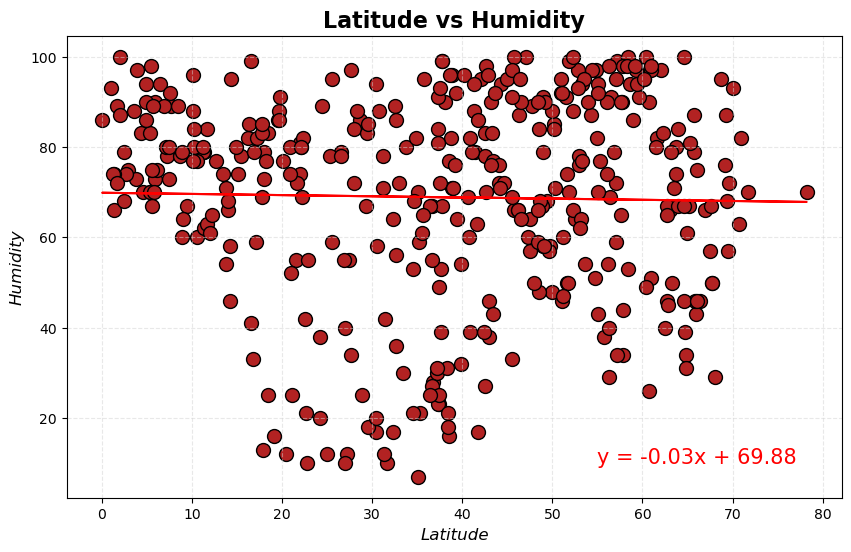

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (55,10))

The r-squared is: 0.005375599624555854


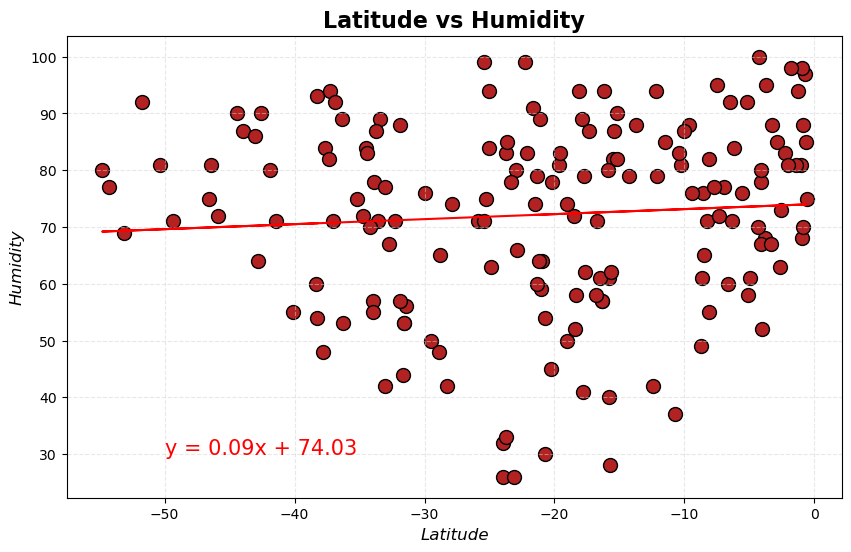

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-50,30))

**Discussion about the linear relationship:** I do not believe there is a real correlation here. The line of best fit for both hemispheres do not have much of a slope.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005983261950040557


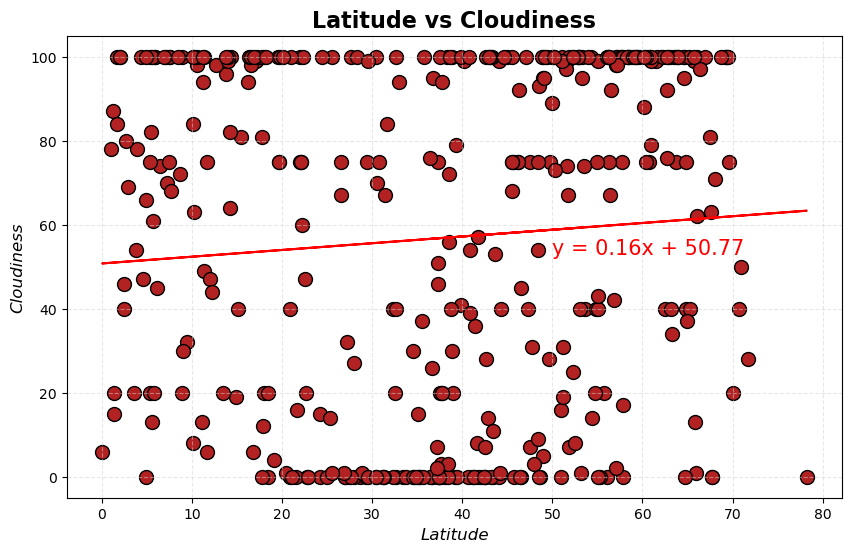

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (50,53))

The r-squared is: 0.00982698406565115


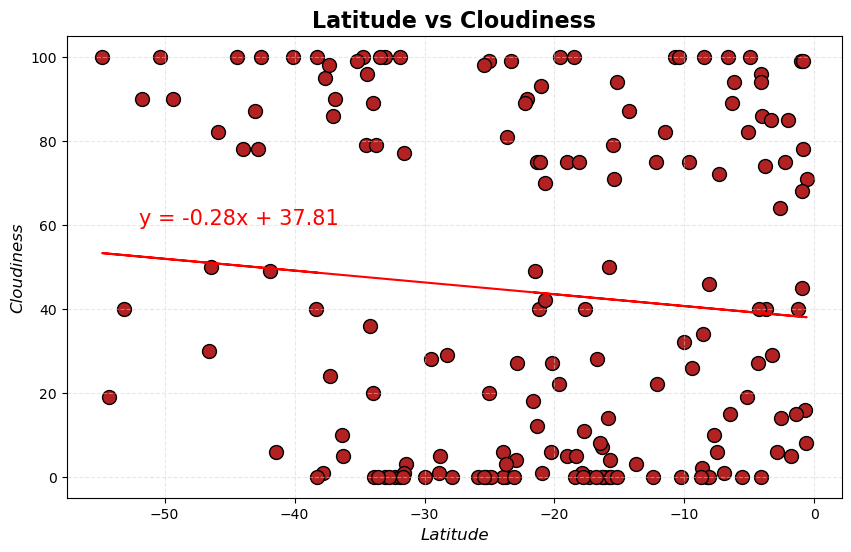

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-52,60))

**Discussion about the linear relationship:** It is more cloudy the farther away from the Equator that you go.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004684197031355675


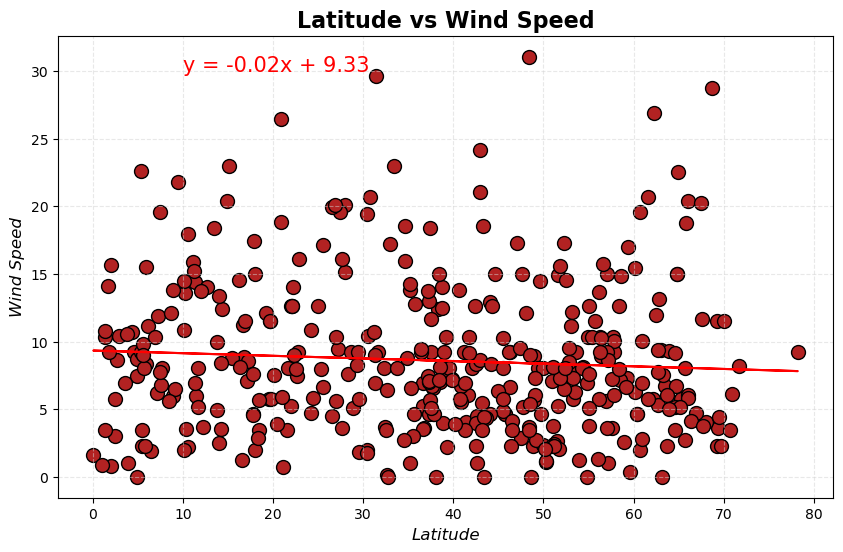

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (10,30))

The r-squared is: 0.023956762453549628


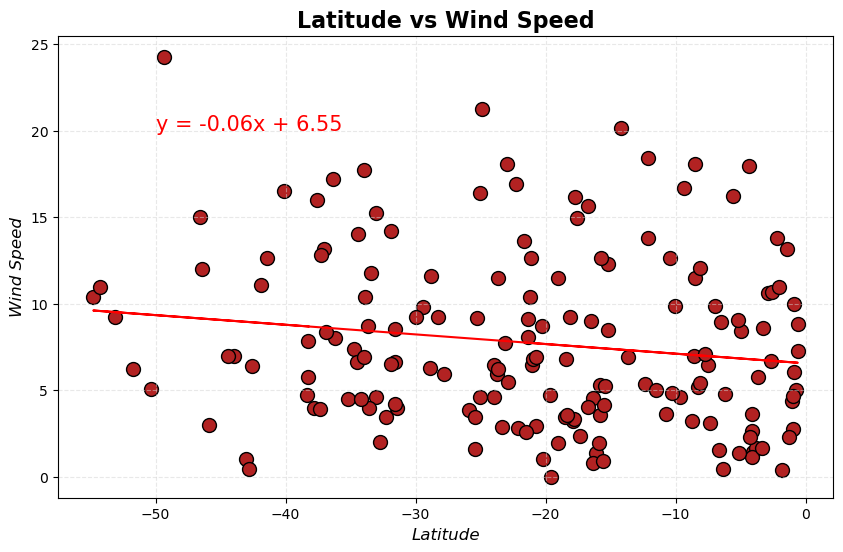

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-50,20))

**Discussion about the linear relationship:** Wind speed is not affected by the distance from the Equator